In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/practise datasets/Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [5]:
data_copy=data.copy()

In [6]:
data_copy['Description']=data_copy["Description"].fillna("Unkown Product")
data_copy["CustomerID"]=data_copy["CustomerID"].fillna("0")

In [7]:
data_copy.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


In [8]:
data_copy['CustomerID']=data_copy["CustomerID"].astype("int64")
data_copy.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


In [9]:
data_copy["Revenue"]=data_copy["Quantity"] * data_copy["UnitPrice"]


In [10]:
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [11]:
Amount_spend= data_copy.groupby("CustomerID")["Revenue"].sum()


In [12]:
print(Amount_spend.sort_values(ascending=False))

CustomerID
0        1447682.12
14646     279489.02
18102     256438.49
17450     187482.17
14911     132572.62
            ...    
12503      -1126.00
17603      -1165.30
14213      -1192.20
15369      -1592.49
17448      -4287.63
Name: Revenue, Length: 4373, dtype: float64


In [13]:
frequency= data_copy.groupby("CustomerID")["InvoiceNo"].nunique()

In [14]:
print(frequency.sort_values(ascending=False))


CustomerID
0        3710
14911     248
12748     224
17841     169
14606     128
         ... 
18249       1
18240       1
12378       1
12374       1
12373       1
Name: InvoiceNo, Length: 4373, dtype: int64


In [15]:
print(type(frequency))

<class 'pandas.core.series.Series'>


In [16]:
import datetime as dt

In [17]:
Reference_date= data_copy['InvoiceDate'].max()+pd.Timedelta(days=1)

In [18]:
print(Reference_date)

2011-12-10 12:50:00


In [19]:
recent_purchase=data_copy.groupby("CustomerID")["InvoiceDate"].max().apply(lambda x:(Reference_date-x).days)

In [20]:
print(recent_purchase)

CustomerID
0          1
12346    326
12347      2
12348     75
12349     19
        ... 
18280    278
18281    181
18282      8
18283      4
18287     43
Name: InvoiceDate, Length: 4373, dtype: int64


In [21]:
RFM=pd.DataFrame({"recency":recent_purchase,"frequency":frequency,"monetary":Amount_spend})

In [22]:
print(RFM.head())

            recency  frequency    monetary
CustomerID                                
0                 1       3710  1447682.12
12346           326          2        0.00
12347             2          7     4310.00
12348            75          4     1797.24
12349            19          1     1757.55


In [23]:
RFM=RFM.drop(index=0)

In [24]:
print(RFM)

            recency  frequency  monetary
CustomerID                              
12346           326          2      0.00
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40
...             ...        ...       ...
18280           278          1    180.60
18281           181          1     80.82
18282             8          3    176.60
18283             4         16   2094.88
18287            43          3   1837.28

[4372 rows x 3 columns]


In [25]:
RFM["R_score"]=pd.qcut(RFM["recency"],5,labels=[5,4,3,2,1])

In [26]:
RFM["F_score"]=pd.qcut(RFM["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])

In [27]:
RFM["M_score"]=pd.qcut(RFM["monetary"],5,labels=[1,2,3,4,5])

In [28]:
print(RFM)

            recency  frequency  monetary R_score F_score M_score
CustomerID                                                      
12346           326          2      0.00       1       2       1
12347             2          7   4310.00       5       4       5
12348            75          4   1797.24       2       3       4
12349            19          1   1757.55       4       1       4
12350           310          1    334.40       1       1       2
...             ...        ...       ...     ...     ...     ...
18280           278          1    180.60       1       2       1
18281           181          1     80.82       1       2       1
18282             8          3    176.60       5       3       1
18283             4         16   2094.88       5       5       5
18287            43          3   1837.28       3       3       4

[4372 rows x 6 columns]


In [29]:
RFM['RFM_segment']=RFM["R_score"].astype(str)+RFM["F_score"].astype(str)+RFM["M_score"].astype(str)

In [30]:
print(RFM)

            recency  frequency  monetary R_score F_score M_score RFM_segment
CustomerID                                                                  
12346           326          2      0.00       1       2       1         121
12347             2          7   4310.00       5       4       5         545
12348            75          4   1797.24       2       3       4         234
12349            19          1   1757.55       4       1       4         414
12350           310          1    334.40       1       1       2         112
...             ...        ...       ...     ...     ...     ...         ...
18280           278          1    180.60       1       2       1         121
18281           181          1     80.82       1       2       1         121
18282             8          3    176.60       5       3       1         531
18283             4         16   2094.88       5       5       5         555
18287            43          3   1837.28       3       3       4         334

In [31]:
RFM['RFM_score']=RFM["R_score"].astype(int)+RFM["F_score"].astype(int)+RFM["M_score"].astype(int)


In [32]:
print(RFM)

            recency  frequency  monetary R_score F_score M_score RFM_segment  \
CustomerID                                                                     
12346           326          2      0.00       1       2       1         121   
12347             2          7   4310.00       5       4       5         545   
12348            75          4   1797.24       2       3       4         234   
12349            19          1   1757.55       4       1       4         414   
12350           310          1    334.40       1       1       2         112   
...             ...        ...       ...     ...     ...     ...         ...   
18280           278          1    180.60       1       2       1         121   
18281           181          1     80.82       1       2       1         121   
18282             8          3    176.60       5       3       1         531   
18283             4         16   2094.88       5       5       5         555   
18287            43          3   1837.28

Text(0.5, 0, 'Amount spent')

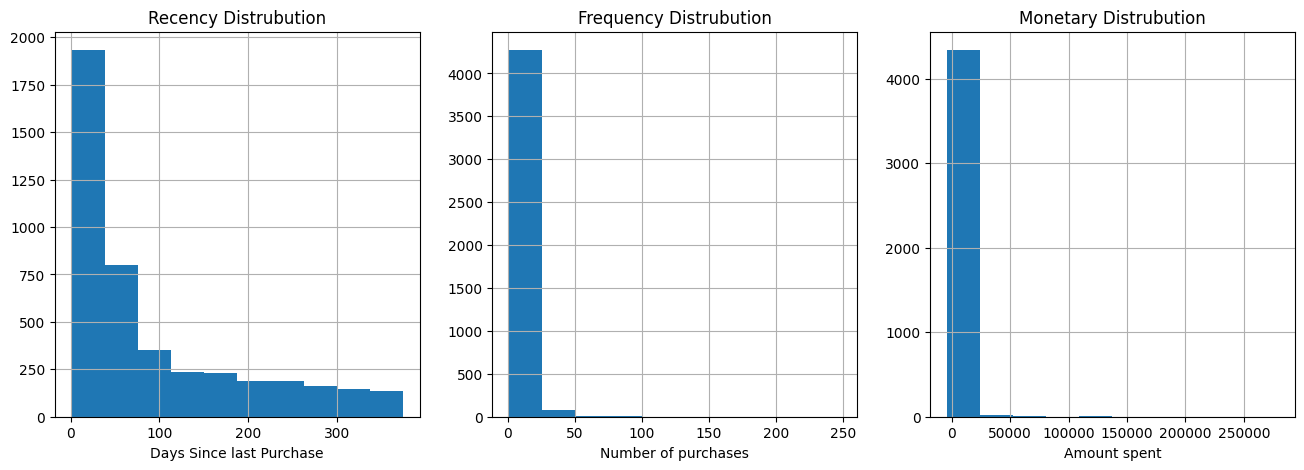

In [33]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,3,figsize=(16,5))
RFM['recency'].hist(ax=axes[0])
axes[0].set_title("Recency Distrubution")
axes[0].set_xlabel("Days Since last Purchase")

RFM['frequency'].hist(ax=axes[1])
axes[1].set_title("Frequency Distrubution")
axes[1].set_xlabel("Number of purchases")

RFM['monetary'].hist(ax=axes[2])
axes[2].set_title("Monetary Distrubution")
axes[2].set_xlabel("Amount spent")


Text(0, 0.5, 'Total no of Customers')

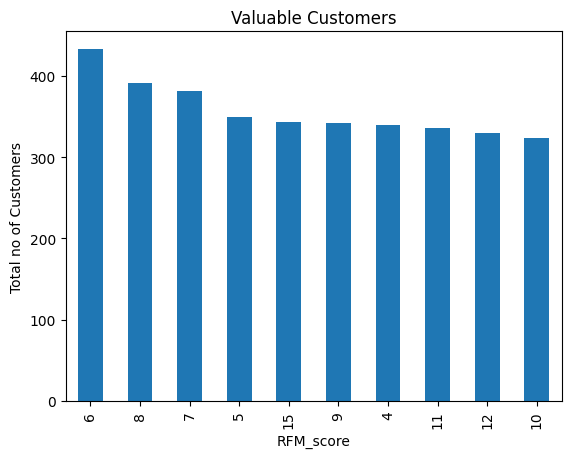

In [34]:
RFM['RFM_score'].value_counts().head(10).plot(kind='bar')
plt.title("Valuable Customers")
plt.ylabel("Total no of Customers")



Text(0.5, 1.0, 'Customer Category Based on RFM Score')

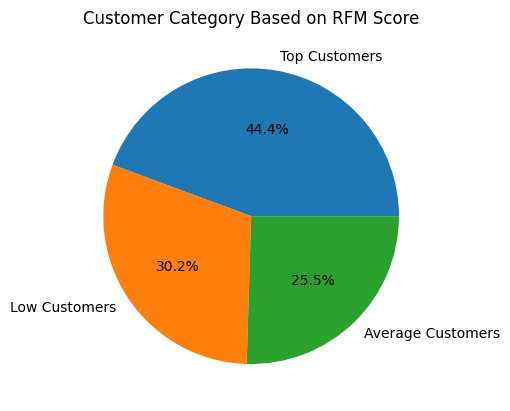

In [40]:
def learning(a):
  if a["RFM_score"]>=10:
    return "Top Customers"
  elif a["RFM_score"]>6:
    return "Average Customers"
  else:
    return "Low Customers"

RFM["Label"]=RFM.apply(learning,axis=1)
RFM['Label'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.title("Customer Category Based on RFM Score")


In [36]:
RFM.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score,Label
CustomerID,,,,,,,,,
12346,326,2,0.00,1,2,1,121,4,Low Customers
12347,2,7,4310.00,5,4,5,545,14,Top Customers
12348,75,4,1797.24,2,3,4,234,9,Average Customers
12349,19,1,1757.55,4,1,4,414,9,Average Customers
12350,310,1,334.40,1,1,2,112,4,Low Customers
